Claudia Martinez
Maestria en Inteligencia Artificial Aplicada


# Analisis Bivariado

Se va a analizar la columna de glucosa, y la varaible BMI(indice de masa corporal) ya que es la que nos va a dar informacion sobre los valores mas relevantes para la diabetes.

In [35]:
#Primero, debemos cargar las librerías que vamos a utilizar:

import pandas as pd   ## Libreria para manipular y analizar datos
import matplotlib.pyplot as plt  ## Libreria para visualizar
import seaborn as sns   ## Libreria para visualizar
import numpy as np  ## Libreria para operaciones numéricas
import plotly  ## Libreria para visualizaciones interactivas
import matplotlib.ticker as mtick  ## función para formatear en visualizaciones
from scipy.stats import skew, kurtosis  ## funciones estadísticas

In [36]:
# Paso 1: Cargar el archivo CSV desde una URL en un DataFrame de Pandas 
# Ruta del archivo CSV
#ruta_archivo = 'https://raw.githubusercontent.com/armandoordonez/eda_couse/main/data/prediccion_prestamo_train.csv'  # Reemplaza con la ruta de tu archivo CSV
ruta_archivo = 'https://raw.githubusercontent.com/claudia-pixel/taller1/main/diabetes.csv'  # Reemplaza con la ruta de tu archivo CSV
# Cargar el archivo CSV en un DataFrame de Pandas 
data = pd.read_csv(ruta_archivo,sep=';')

In [4]:
data.describe() #estadisticos descriptivos

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Clase
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [5]:
# Paso 2: Análisis Exploratorio de datos simplificado

# Puedes imprimir información básica sobre el conjunto de datos

print("Información del conjunto de datos:")
print(data.info())

Información del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Clase                     2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB
None


In [6]:
# Paso 2: Análisis Exploratorio de datos simplificado

# Puedes imprimir información básica sobre el conjunto de datos

print("Información del conjunto de datos:")
print(data.info())

Información del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Clase                     2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB
None


In [7]:
# Mostrar estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(data.describe())


Estadísticas descriptivas:
       Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2000.000000  2000.000000    2000.000000    2000.000000  2000.000000   
mean      3.703500   121.182500      69.145500      20.935000    80.254000   
std       3.306063    32.068636      19.188315      16.103243   111.180534   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      63.500000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    40.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000   199.000000     122.000000     110.000000   744.000000   

               BMI  DiabetesPedigreeFunction          Age        Clase  
count  2000.000000               2000.000000  2000.000000  2000.000000  
mean     32.193000                  0.470930    33.090500     0.342000  
std       8.149901                  0.323553    11

In [8]:
# Paso 3: Preprocesamiento de datos 
# Algo de limpieza de datos
# eliminamos los nulos
data = data.dropna()

In [9]:
# mostramos nuevemamente la información general del dataset 
# para verificar que no hayan nulos
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Clase                     2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB
None


In [10]:
resultado = data['Glucose'] #separando el dataframe por la variable Glucose.
resultado

0       138
1        84
2       145
3       135
4       139
       ... 
1995     75
1996    179
1997     85
1998    129
1999     81
Name: Glucose, Length: 2000, dtype: int64

In [43]:
resultado2 = data['BMI'] #separando el dataframe por la variable BMI.
resultado2

0       33.6
1       38.2
2       44.2
3       42.3
4       40.7
        ... 
1995    29.7
1996    32.7
1997    31.2
1998    67.1
1999    30.1
Name: BMI, Length: 2000, dtype: float64

In [14]:
df = data.copy() #copia de dataframe

<Axes: xlabel='Glucose', ylabel='BMI'>

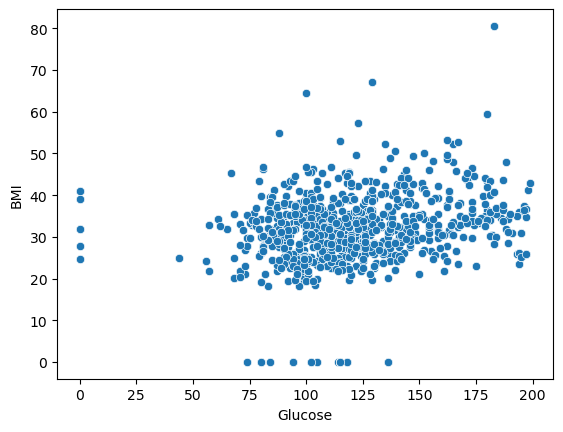

In [12]:
sns.scatterplot(data=data, x='Glucose', y='BMI')

Los datos se concentran en mas de 75 de glucosa e indice de masa corporal mayor a 25.

C:\Users\yanet\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


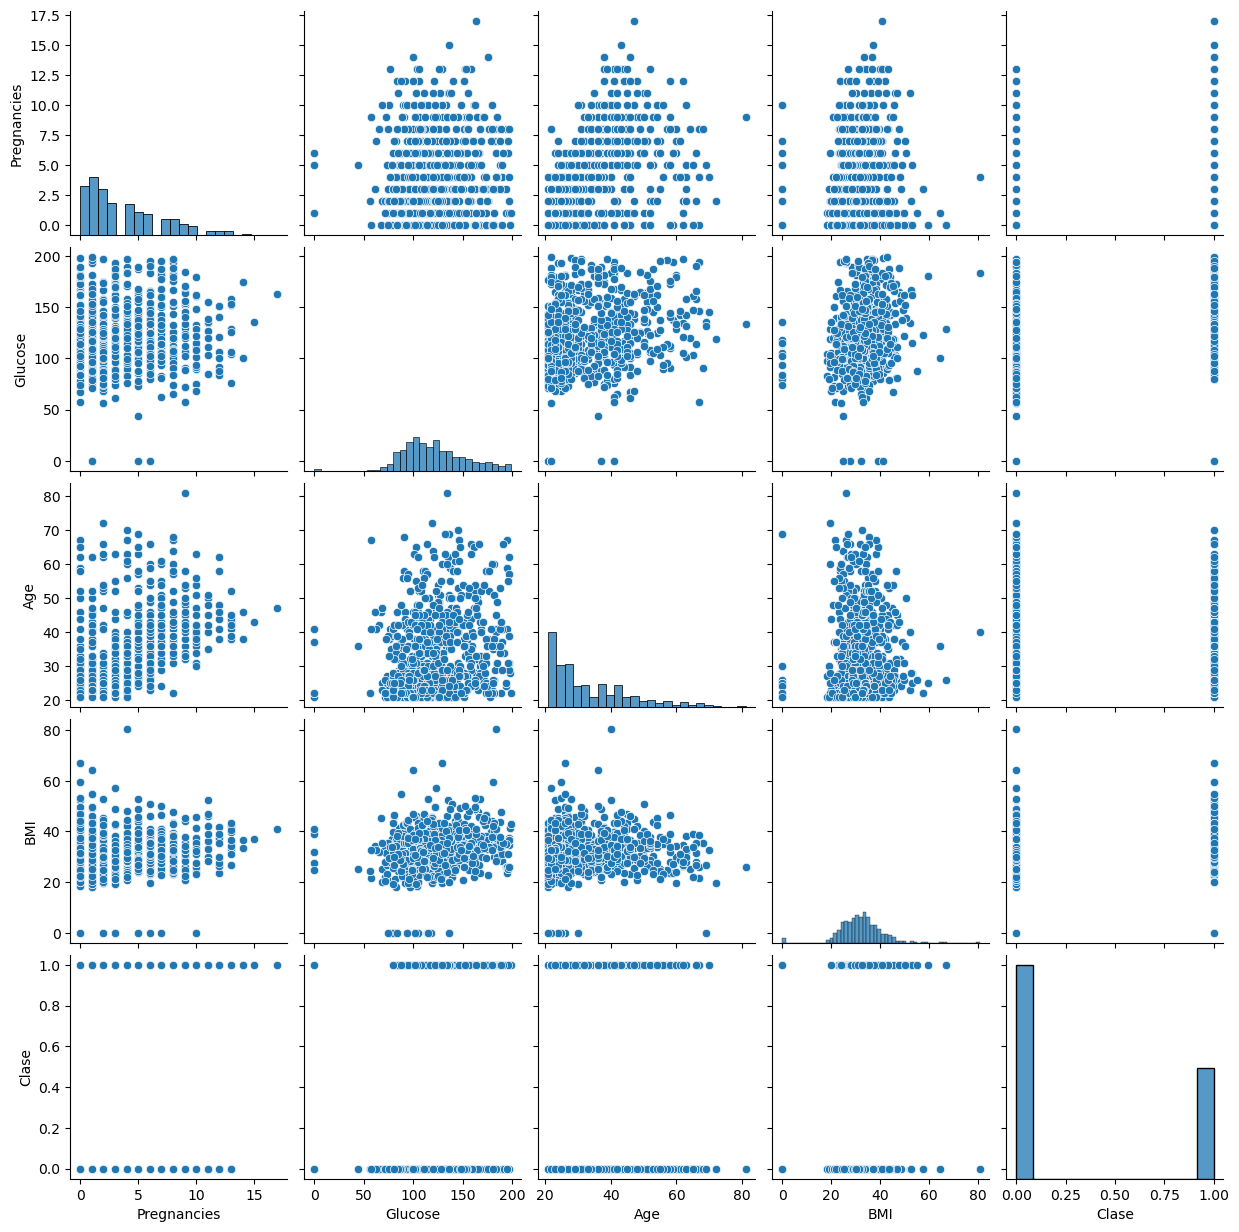

In [21]:
sns.pairplot(df[['Pregnancies','Glucose','Age','BMI','Clase']])

In [24]:
correlacionp = df.corr(numeric_only = True,  method = 'pearson')
correlacionp

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Clase
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Clase,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


Conclusion
Este valor mide la fuerza y la direccion de la relacion entre dos variables. valores cercanos a 1 indican una relacion positiva fuerte, mientras que valores cercanos a -1 indican una relacion negativa fuerte.

In [40]:
correlacionKenp = df.corr(numeric_only = True,  method = 'kendall')
correlacionKenp

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Clase
Pregnancies,1.000000,0.079286,0.130738,-0.054756,-0.101997,-0.001330,-0.027906,0.453643,0.167642
Glucose,0.079286,1.000000,0.147365,0.048161,0.170394,0.153759,0.048884,0.185454,0.386896
BloodPressure,0.130738,0.147365,1.000000,0.108838,-0.004467,0.199893,0.018728,0.245786,0.128585
SkinThickness,-0.054756,0.048161,0.108838,1.000000,0.413327,0.349552,0.122527,-0.036307,0.080447
Insulin,-0.101997,0.170394,-0.004467,0.413327,1.000000,0.160280,0.169894,-0.086797,0.055330
BMI,-0.001330,0.153759,0.199893,0.349552,0.160280,1.000000,0.092427,0.082289,0.245580
DiabetesPedigreeFunction,-0.027906,0.048884,0.018728,0.122527,0.169894,0.092427,1.000000,0.023899,0.121534
Age,0.453643,0.185454,0.245786,-0.036307,-0.086797,0.082289,0.023899,1.000000,0.258643
Clase,0.167642,0.386896,0.128585,0.080447,0.055330,0.245580,0.121534,0.258643,1.000000


In [42]:
correlacionsp1 = df.corr(numeric_only = True,  method = 'spearman')
correlacionsp1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Clase
Pregnancies,1.000000,0.113963,0.177586,-0.072205,-0.133894,-0.006969,-0.039908,0.598020,0.195180
Glucose,0.113963,1.000000,0.218068,0.072516,0.222479,0.227460,0.071894,0.269762,0.471294
BloodPressure,0.177586,0.218068,1.000000,0.147944,-0.007185,0.286740,0.028455,0.350188,0.154092
SkinThickness,-0.072205,0.072516,0.147944,1.000000,0.533525,0.468604,0.175107,-0.053869,0.094745
Insulin,-0.133894,0.222479,-0.007185,0.533525,1.000000,0.218913,0.232121,-0.123015,0.062963
BMI,-0.006969,0.227460,0.286740,0.468604,0.218913,1.000000,0.138046,0.122502,0.299805
DiabetesPedigreeFunction,-0.039908,0.071894,0.028455,0.175107,0.232121,0.138046,1.000000,0.036910,0.148650
Age,0.598020,0.269762,0.350188,-0.053869,-0.123015,0.122502,0.036910,1.000000,0.310411
Clase,0.195180,0.471294,0.154092,0.094745,0.062963,0.299805,0.148650,0.310411,1.000000
